In [7]:
# For data manipulation
import numpy as np
import pandas as pd
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)
# For data modeling
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
# For saving models
import pickle

In [8]:
nyc_collisions = pd.read_csv('nyc_collisions.csv')

In [9]:
nyc_totals = pd.read_csv('nyc_total.csv')

In [10]:
nyc_collisions.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,NaN,Passing or Lane Usage Improper,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,2024-03-03 22:10:00,40.664840,-73.82229,"(40.66484, -73.82229)",0,0,2,0,0,0,2,0,NaN,BELT PARKWAY,4706774,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,NaN
1,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,NaN,2024-03-03 21:13:00,40.666520,-73.81354,"(40.66652, -73.81354)",0,0,1,0,0,0,1,0,NaN,BELT PARKWAY,4706775,Sedan,Sedan,NaN,NaN,NaN,NaN
2,BROOKLYN,Alcohol Involvement,Alcohol Involvement,NaN,NaN,NaN,NaN,2024-03-03 20:00:00,40.651104,-74.00407,"(40.651104, -74.00407)",0,0,0,0,0,0,0,0,3919 5 AVENUE,NaN,4706754,Sedan,Sedan,NaN,NaN,NaN,11232.0
3,QUEENS,Brakes Defective,Unspecified,NaN,NaN,NaN,21 STREET,2024-03-03 19:52:00,40.762825,-73.93398,"(40.762825, -73.93398)",0,0,1,0,0,0,1,0,NaN,34 AVENUE,4706759,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11106.0
4,BROOKLYN,Driver Inattention/Distraction,Driver Inattention/Distraction,Unspecified,NaN,NaN,SHORE PARKWAY,2024-03-03 18:30:00,40.599453,-74.00720,"(40.599453, -74.0072)",0,0,0,0,0,0,0,0,NaN,19 AVENUE,4707103,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,11214.0


In [11]:
nyc_totals.head()

,unique_key,total_injured,total_deaths
0,166,10,0
1,790,8,0
2,1161,10,0
3,1602,8,0
4,5293,8,0


In [12]:
nyc_merged = nyc_collisions.merge(nyc_totals, on="unique_key")

In [13]:
nyc_merged.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,total_injured,total_deaths
0,NaN,Passing or Lane Usage Improper,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,2024-03-03 22:10:00,40.664840,-73.82229,"(40.66484, -73.82229)",0,0,2,0,0,0,2,0,NaN,BELT PARKWAY,4706774,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,NaN,4,0
1,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,NaN,2024-03-03 21:13:00,40.666520,-73.81354,"(40.66652, -73.81354)",0,0,1,0,0,0,1,0,NaN,BELT PARKWAY,4706775,Sedan,Sedan,NaN,NaN,NaN,NaN,2,0
2,BROOKLYN,Alcohol Involvement,Alcohol Involvement,NaN,NaN,NaN,NaN,2024-03-03 20:00:00,40.651104,-74.00407,"(40.651104, -74.00407)",0,0,0,0,0,0,0,0,3919 5 AVENUE,NaN,4706754,Sedan,Sedan,NaN,NaN,NaN,11232.0,0,0
3,QUEENS,Brakes Defective,Unspecified,NaN,NaN,NaN,21 STREET,2024-03-03 19:52:00,40.762825,-73.93398,"(40.762825, -73.93398)",0,0,1,0,0,0,1,0,NaN,34 AVENUE,4706759,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11106.0,2,0
4,BROOKLYN,Driver Inattention/Distraction,Driver Inattention/Distraction,Unspecified,NaN,NaN,SHORE PARKWAY,2024-03-03 18:30:00,40.599453,-74.00720,"(40.599453, -74.0072)",0,0,0,0,0,0,0,0,NaN,19 AVENUE,4707103,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,11214.0,0,0


In [14]:
nyc_merged.shape

(1837243, 30)

In [15]:
nyc_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837243 entries, 0 to 1837242
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   borough                        object 
 1   contributing_factor_vehicle_1  object 
 2   contributing_factor_vehicle_2  object 
 3   contributing_factor_vehicle_3  object 
 4   contributing_factor_vehicle_4  object 
 5   contributing_factor_vehicle_5  object 
 6   cross_street_name              object 
 7   timestamp                      object 
 8   latitude                       float64
 9   longitude                      float64
 10  location                       object 
 11  number_of_cyclist_injured      int64  
 12  number_of_cyclist_killed       int64  
 13  number_of_motorist_injured     int64  
 14  number_of_motorist_killed      int64  
 15  number_of_pedestrians_injured  int64  
 16  number_of_pedestrians_killed   int64  
 17  number_of_persons_injured      int64  
 18  nu

In [16]:
nyc_merged['month'] = pd.to_datetime(nyc_merged['timestamp']).dt.month
nyc_merged.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,total_injured,total_deaths,month
0,NaN,Passing or Lane Usage Improper,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,2024-03-03 22:10:00,40.664840,-73.82229,"(40.66484, -73.82229)",0,0,2,0,0,0,2,0,NaN,BELT PARKWAY,4706774,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,NaN,4,0,3
1,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,NaN,2024-03-03 21:13:00,40.666520,-73.81354,"(40.66652, -73.81354)",0,0,1,0,0,0,1,0,NaN,BELT PARKWAY,4706775,Sedan,Sedan,NaN,NaN,NaN,NaN,2,0,3
2,BROOKLYN,Alcohol Involvement,Alcohol Involvement,NaN,NaN,NaN,NaN,2024-03-03 20:00:00,40.651104,-74.00407,"(40.651104, -74.00407)",0,0,0,0,0,0,0,0,3919 5 AVENUE,NaN,4706754,Sedan,Sedan,NaN,NaN,NaN,11232.0,0,0,3
3,QUEENS,Brakes Defective,Unspecified,NaN,NaN,NaN,21 STREET,2024-03-03 19:52:00,40.762825,-73.93398,"(40.762825, -73.93398)",0,0,1,0,0,0,1,0,NaN,34 AVENUE,4706759,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11106.0,2,0,3
4,BROOKLYN,Driver Inattention/Distraction,Driver Inattention/Distraction,Unspecified,NaN,NaN,SHORE PARKWAY,2024-03-03 18:30:00,40.599453,-74.00720,"(40.599453, -74.0072)",0,0,0,0,0,0,0,0,NaN,19 AVENUE,4707103,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,11214.0,0,0,3


In [17]:
nyc_merged['year'] = pd.to_datetime(nyc_merged['timestamp']).dt.year
nyc_merged.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,total_injured,total_deaths,month,year
0,NaN,Passing or Lane Usage Improper,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,2024-03-03 22:10:00,40.664840,-73.82229,"(40.66484, -73.82229)",0,0,2,0,0,0,2,0,NaN,BELT PARKWAY,4706774,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,NaN,4,0,3,2024
1,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,NaN,2024-03-03 21:13:00,40.666520,-73.81354,"(40.66652, -73.81354)",0,0,1,0,0,0,1,0,NaN,BELT PARKWAY,4706775,Sedan,Sedan,NaN,NaN,NaN,NaN,2,0,3,2024
2,BROOKLYN,Alcohol Involvement,Alcohol Involvement,NaN,NaN,NaN,NaN,2024-03-03 20:00:00,40.651104,-74.00407,"(40.651104, -74.00407)",0,0,0,0,0,0,0,0,3919 5 AVENUE,NaN,4706754,Sedan,Sedan,NaN,NaN,NaN,11232.0,0,0,3,2024
3,QUEENS,Brakes Defective,Unspecified,NaN,NaN,NaN,21 STREET,2024-03-03 19:52:00,40.762825,-73.93398,"(40.762825, -73.93398)",0,0,1,0,0,0,1,0,NaN,34 AVENUE,4706759,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11106.0,2,0,3,2024
4,BROOKLYN,Driver Inattention/Distraction,Driver Inattention/Distraction,Unspecified,NaN,NaN,SHORE PARKWAY,2024-03-03 18:30:00,40.599453,-74.00720,"(40.599453, -74.0072)",0,0,0,0,0,0,0,0,NaN,19 AVENUE,4707103,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,11214.0,0,0,3,2024


In [18]:
nyc_merged['hour'] = pd.to_datetime(nyc_merged['timestamp']).dt.hour
nyc_merged.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,total_injured,total_deaths,month,year,hour
0,NaN,Passing or Lane Usage Improper,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,2024-03-03 22:10:00,40.664840,-73.82229,"(40.66484, -73.82229)",0,0,2,0,0,0,2,0,NaN,BELT PARKWAY,4706774,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,NaN,4,0,3,2024,22
1,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,NaN,2024-03-03 21:13:00,40.666520,-73.81354,"(40.66652, -73.81354)",0,0,1,0,0,0,1,0,NaN,BELT PARKWAY,4706775,Sedan,Sedan,NaN,NaN,NaN,NaN,2,0,3,2024,21
2,BROOKLYN,Alcohol Involvement,Alcohol Involvement,NaN,NaN,NaN,NaN,2024-03-03 20:00:00,40.651104,-74.00407,"(40.651104, -74.00407)",0,0,0,0,0,0,0,0,3919 5 AVENUE,NaN,4706754,Sedan,Sedan,NaN,NaN,NaN,11232.0,0,0,3,2024,20
3,QUEENS,Brakes Defective,Unspecified,NaN,NaN,NaN,21 STREET,2024-03-03 19:52:00,40.762825,-73.93398,"(40.762825, -73.93398)",0,0,1,0,0,0,1,0,NaN,34 AVENUE,4706759,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11106.0,2,0,3,2024,19
4,BROOKLYN,Driver Inattention/Distraction,Driver Inattention/Distraction,Unspecified,NaN,NaN,SHORE PARKWAY,2024-03-03 18:30:00,40.599453,-74.00720,"(40.599453, -74.0072)",0,0,0,0,0,0,0,0,NaN,19 AVENUE,4707103,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,11214.0,0,0,3,2024,18


In [19]:
nyc_merged.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,total_injured,total_deaths,month,year,hour
0,NaN,Passing or Lane Usage Improper,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,2024-03-03 22:10:00,40.664840,-73.82229,"(40.66484, -73.82229)",0,0,2,0,0,0,2,0,NaN,BELT PARKWAY,4706774,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,NaN,4,0,3,2024,22
1,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,NaN,2024-03-03 21:13:00,40.666520,-73.81354,"(40.66652, -73.81354)",0,0,1,0,0,0,1,0,NaN,BELT PARKWAY,4706775,Sedan,Sedan,NaN,NaN,NaN,NaN,2,0,3,2024,21
2,BROOKLYN,Alcohol Involvement,Alcohol Involvement,NaN,NaN,NaN,NaN,2024-03-03 20:00:00,40.651104,-74.00407,"(40.651104, -74.00407)",0,0,0,0,0,0,0,0,3919 5 AVENUE,NaN,4706754,Sedan,Sedan,NaN,NaN,NaN,11232.0,0,0,3,2024,20
3,QUEENS,Brakes Defective,Unspecified,NaN,NaN,NaN,21 STREET,2024-03-03 19:52:00,40.762825,-73.93398,"(40.762825, -73.93398)",0,0,1,0,0,0,1,0,NaN,34 AVENUE,4706759,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11106.0,2,0,3,2024,19
4,BROOKLYN,Driver Inattention/Distraction,Driver Inattention/Distraction,Unspecified,NaN,NaN,SHORE PARKWAY,2024-03-03 18:30:00,40.599453,-74.00720,"(40.599453, -74.0072)",0,0,0,0,0,0,0,0,NaN,19 AVENUE,4707103,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,11214.0,0,0,3,2024,18


In [20]:
nyc_merged['weekday'] = pd.to_datetime(nyc_merged['timestamp']).dt.day_name()
nyc_merged.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,total_injured,total_deaths,month,year,hour,weekday
0,NaN,Passing or Lane Usage Improper,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,2024-03-03 22:10:00,40.664840,-73.82229,"(40.66484, -73.82229)",0,0,2,0,0,0,2,0,NaN,BELT PARKWAY,4706774,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,NaN,4,0,3,2024,22,Sunday
1,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,NaN,2024-03-03 21:13:00,40.666520,-73.81354,"(40.66652, -73.81354)",0,0,1,0,0,0,1,0,NaN,BELT PARKWAY,4706775,Sedan,Sedan,NaN,NaN,NaN,NaN,2,0,3,2024,21,Sunday
2,BROOKLYN,Alcohol Involvement,Alcohol Involvement,NaN,NaN,NaN,NaN,2024-03-03 20:00:00,40.651104,-74.00407,"(40.651104, -74.00407)",0,0,0,0,0,0,0,0,3919 5 AVENUE,NaN,4706754,Sedan,Sedan,NaN,NaN,NaN,11232.0,0,0,3,2024,20,Sunday
3,QUEENS,Brakes Defective,Unspecified,NaN,NaN,NaN,21 STREET,2024-03-03 19:52:00,40.762825,-73.93398,"(40.762825, -73.93398)",0,0,1,0,0,0,1,0,NaN,34 AVENUE,4706759,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11106.0,2,0,3,2024,19,Sunday
4,BROOKLYN,Driver Inattention/Distraction,Driver Inattention/Distraction,Unspecified,NaN,NaN,SHORE PARKWAY,2024-03-03 18:30:00,40.599453,-74.00720,"(40.599453, -74.0072)",0,0,0,0,0,0,0,0,NaN,19 AVENUE,4707103,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,11214.0,0,0,3,2024,18,Sunday


In [21]:
conditions = [
    (nyc_merged['total_deaths'] == 0),
    (nyc_merged['total_deaths'] > 0)
    ]

values = ['no_death', 'death']

nyc_merged['deaths'] = np.select(conditions, values)

In [22]:
conditions = [
    (nyc_merged['total_injured'] == 0),
    (nyc_merged['total_injured'] > 0)
    ]

values = ['no_injuries', 'injuries']

nyc_merged['injuries'] = np.select(conditions, values)

In [23]:
nyc_merged.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,total_injured,total_deaths,month,year,hour,weekday,deaths,injuries
0,NaN,Passing or Lane Usage Improper,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,2024-03-03 22:10:00,40.664840,-73.82229,"(40.66484, -73.82229)",0,0,2,0,0,0,2,0,NaN,BELT PARKWAY,4706774,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,NaN,4,0,3,2024,22,Sunday,no_death,injuries
1,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,NaN,2024-03-03 21:13:00,40.666520,-73.81354,"(40.66652, -73.81354)",0,0,1,0,0,0,1,0,NaN,BELT PARKWAY,4706775,Sedan,Sedan,NaN,NaN,NaN,NaN,2,0,3,2024,21,Sunday,no_death,injuries
2,BROOKLYN,Alcohol Involvement,Alcohol Involvement,NaN,NaN,NaN,NaN,2024-03-03 20:00:00,40.651104,-74.00407,"(40.651104, -74.00407)",0,0,0,0,0,0,0,0,3919 5 AVENUE,NaN,4706754,Sedan,Sedan,NaN,NaN,NaN,11232.0,0,0,3,2024,20,Sunday,no_death,no_injuries
3,QUEENS,Brakes Defective,Unspecified,NaN,NaN,NaN,21 STREET,2024-03-03 19:52:00,40.762825,-73.93398,"(40.762825, -73.93398)",0,0,1,0,0,0,1,0,NaN,34 AVENUE,4706759,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11106.0,2,0,3,2024,19,Sunday,no_death,injuries
4,BROOKLYN,Driver Inattention/Distraction,Driver Inattention/Distraction,Unspecified,NaN,NaN,SHORE PARKWAY,2024-03-03 18:30:00,40.599453,-74.00720,"(40.599453, -74.0072)",0,0,0,0,0,0,0,0,NaN,19 AVENUE,4707103,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,11214.0,0,0,3,2024,18,Sunday,no_death,no_injuries


In [24]:
nyc_merged['latitude_clean'] = nyc_merged['latitude'].apply(lambda x: round(x, 2))

In [25]:
nyc_merged['longitude_clean'] = nyc_merged['longitude'].apply(lambda x: round(x, 2))

In [26]:
nyc_merged.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,total_injured,total_deaths,month,year,hour,weekday,deaths,injuries,latitude_clean,longitude_clean
0,NaN,Passing or Lane Usage Improper,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,2024-03-03 22:10:00,40.664840,-73.82229,"(40.66484, -73.82229)",0,0,2,0,0,0,2,0,NaN,BELT PARKWAY,4706774,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,NaN,4,0,3,2024,22,Sunday,no_death,injuries,40.66,-73.82
1,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,NaN,2024-03-03 21:13:00,40.666520,-73.81354,"(40.66652, -73.81354)",0,0,1,0,0,0,1,0,NaN,BELT PARKWAY,4706775,Sedan,Sedan,NaN,NaN,NaN,NaN,2,0,3,2024,21,Sunday,no_death,injuries,40.67,-73.81
2,BROOKLYN,Alcohol Involvement,Alcohol Involvement,NaN,NaN,NaN,NaN,2024-03-03 20:00:00,40.651104,-74.00407,"(40.651104, -74.00407)",0,0,0,0,0,0,0,0,3919 5 AVENUE,NaN,4706754,Sedan,Sedan,NaN,NaN,NaN,11232.0,0,0,3,2024,20,Sunday,no_death,no_injuries,40.65,-74.00
3,QUEENS,Brakes Defective,Unspecified,NaN,NaN,NaN,21 STREET,2024-03-03 19:52:00,40.762825,-73.93398,"(40.762825, -73.93398)",0,0,1,0,0,0,1,0,NaN,34 AVENUE,4706759,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11106.0,2,0,3,2024,19,Sunday,no_death,injuries,40.76,-73.93
4,BROOKLYN,Driver Inattention/Distraction,Driver Inattention/Distraction,Unspecified,NaN,NaN,SHORE PARKWAY,2024-03-03 18:30:00,40.599453,-74.00720,"(40.599453, -74.0072)",0,0,0,0,0,0,0,0,NaN,19 AVENUE,4707103,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,11214.0,0,0,3,2024,18,Sunday,no_death,no_injuries,40.60,-74.01


In [27]:
nyc_merged = nyc_merged.rename(columns={'vehicle_type_code1': 'vehicle_type_code_1',
                          'vehicle_type_code2': 'vehicle_type_code_2',
                          'number_of_persons_injured': 'number_of_people_injured',
                          'number_of_persons_killed': 'number_of_people_killed',
                            'number_of_cyclist_injured': 'number_of_cyclists_injured',
                            'number_of_cyclist_killed': 'number_of_cyclists_killed',
                            'number_of_motorist_injured': 'number_of_motorists_injured',
                            'number_of_motorist_killed': 'number_of_motorists_killed'})
nyc_merged.columns

Index(['borough', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'cross_street_name', 'timestamp', 'latitude', 'longitude', 'location',
       'number_of_cyclists_injured', 'number_of_cyclists_killed',
       'number_of_motorists_injured', 'number_of_motorists_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_people_injured', 'number_of_people_killed',
       'off_street_name', 'on_street_name', 'unique_key',
       'vehicle_type_code_1', 'vehicle_type_code_2', 'vehicle_type_code_3',
       'vehicle_type_code_4', 'vehicle_type_code_5', 'zip_code',
       'total_injured', 'total_deaths', 'month', 'year', 'hour', 'weekday',
       'deaths', 'injuries', 'latitude_clean', 'longitude_clean'],
      dtype='object')

In [28]:
select_columns = ['total_injured', 'injuries', 'total_deaths', 'deaths', 'location', 'latitude', 'longitude', 'latitude_clean', 'longitude_clean', 'timestamp', 'hour', 'weekday', 'month', 'year', 'unique_key']

In [29]:
nyc_select = nyc_merged[select_columns].copy()
print(nyc_select)

         total_injured     injuries  total_deaths    deaths  \
0                    4     injuries             0  no_death   
1                    2     injuries             0  no_death   
2                    0  no_injuries             0  no_death   
3                    2     injuries             0  no_death   
4                    0  no_injuries             0  no_death   
...                ...          ...           ...       ...   
1837238              0  no_injuries             0  no_death   
1837239              0  no_injuries             0  no_death   
1837240              0  no_injuries             0  no_death   
1837241              0  no_injuries             0  no_death   
1837242              0  no_injuries             0  no_death   

                        location   latitude  longitude  latitude_clean  \
0          (40.66484, -73.82229)  40.664840 -73.822290           40.66   
1          (40.66652, -73.81354)  40.666520 -73.813540           40.67   
2         (40.651104,

In [30]:
nyc_select.head()

,total_injured,injuries,total_deaths,deaths,location,latitude,longitude,latitude_clean,longitude_clean,timestamp,hour,weekday,month,year,unique_key
0,4,injuries,0,no_death,"(40.66484, -73.82229)",40.664840,-73.82229,40.66,-73.82,2024-03-03 22:10:00,22,Sunday,3,2024,4706774
1,2,injuries,0,no_death,"(40.66652, -73.81354)",40.666520,-73.81354,40.67,-73.81,2024-03-03 21:13:00,21,Sunday,3,2024,4706775
2,0,no_injuries,0,no_death,"(40.651104, -74.00407)",40.651104,-74.00407,40.65,-74.00,2024-03-03 20:00:00,20,Sunday,3,2024,4706754
3,2,injuries,0,no_death,"(40.762825, -73.93398)",40.762825,-73.93398,40.76,-73.93,2024-03-03 19:52:00,19,Sunday,3,2024,4706759
4,0,no_injuries,0,no_death,"(40.599453, -74.0072)",40.599453,-74.00720,40.60,-74.01,2024-03-03 18:30:00,18,Sunday,3,2024,4707103


In [31]:
nyc_select.describe().applymap(lambda x: f"{x:0.2f}")

,total_injured,total_deaths,latitude,longitude,latitude_clean,longitude_clean,hour,month,year,unique_key
count,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00
mean,0.62,0.00,40.63,-73.75,40.63,-73.75,13.20,6.71,2017.13,3192023.02
std,1.39,0.08,1.98,3.72,1.98,3.72,5.76,3.43,3.06,1499729.32
min,0.00,0.00,0.00,-201.36,0.00,-201.36,0.00,1.00,2012.00,22.00
25%,0.00,0.00,40.67,-73.97,40.67,-73.97,9.00,4.00,2015.00,3182040.50
50%,0.00,0.00,40.72,-73.93,40.72,-73.93,14.00,7.00,2017.00,3713175.00
75%,0.00,0.00,40.77,-73.87,40.77,-73.87,18.00,10.00,2019.00,4207847.50
max,86.00,16.00,43.34,0.00,43.34,0.00,23.00,12.00,2024.00,4707442.00


In [32]:
nyc_select.isna().sum()

total_injured      0
injuries           0
total_deaths       0
deaths             0
location           0
latitude           0
longitude          0
latitude_clean     0
longitude_clean    0
timestamp          0
hour               0
weekday            0
month              0
year               0
unique_key         0
dtype: int64

In [33]:
nyc_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837243 entries, 0 to 1837242
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   total_injured    int64  
 1   injuries         object 
 2   total_deaths     int64  
 3   deaths           object 
 4   location         object 
 5   latitude         float64
 6   longitude        float64
 7   latitude_clean   float64
 8   longitude_clean  float64
 9   timestamp        object 
 10  hour             int32  
 11  weekday          object 
 12  month            int32  
 13  year             int32  
 14  unique_key       int64  
dtypes: float64(4), int32(3), int64(3), object(5)
memory usage: 189.2+ MB


In [34]:
nyc_select.duplicated().sum()

0

In [35]:
nyc_select.head()

,total_injured,injuries,total_deaths,deaths,location,latitude,longitude,latitude_clean,longitude_clean,timestamp,hour,weekday,month,year,unique_key
0,4,injuries,0,no_death,"(40.66484, -73.82229)",40.664840,-73.82229,40.66,-73.82,2024-03-03 22:10:00,22,Sunday,3,2024,4706774
1,2,injuries,0,no_death,"(40.66652, -73.81354)",40.666520,-73.81354,40.67,-73.81,2024-03-03 21:13:00,21,Sunday,3,2024,4706775
2,0,no_injuries,0,no_death,"(40.651104, -74.00407)",40.651104,-74.00407,40.65,-74.00,2024-03-03 20:00:00,20,Sunday,3,2024,4706754
3,2,injuries,0,no_death,"(40.762825, -73.93398)",40.762825,-73.93398,40.76,-73.93,2024-03-03 19:52:00,19,Sunday,3,2024,4706759
4,0,no_injuries,0,no_death,"(40.599453, -74.0072)",40.599453,-74.00720,40.60,-74.01,2024-03-03 18:30:00,18,Sunday,3,2024,4707103


In [36]:
print(nyc_select['total_injured'].value_counts())
print()
# percent of injured
print(nyc_select['total_injured'].value_counts(normalize=True) * 100)

total_injured
0     1413749
2      324711
4       60231
6       19657
8        7299
1        6333
10       2768
12       1150
14        496
3         257
16        219
18        104
20         79
22         43
5          29
24         28
26         25
30         12
28          7
32          7
7           7
36          6
34          6
44          3
48          3
40          2
38          2
9           2
68          1
46          1
19          1
42          1
54          1
50          1
86          1
64          1
Name: count, dtype: int64

total_injured
0     76.949484
2     17.673819
4      3.278336
6      1.069918
8      0.397280
1      0.344701
10     0.150661
12     0.062594
14     0.026997
3      0.013988
16     0.011920
18     0.005661
20     0.004300
22     0.002340
5      0.001578
24     0.001524
26     0.001361
30     0.000653
28     0.000381
32     0.000381
7      0.000381
36     0.000327
34     0.000327
44     0.000163
48     0.000163
40     0.000109
38     0.000109
9      0.

In [81]:
nyc_select['total_injured'].sum()

1133705

In [37]:
print(nyc_select['total_deaths'].value_counts())
print()
# percent of deaths
print(nyc_select['total_deaths'].value_counts(normalize=True) * 100)

total_deaths
0     1834659
2        2451
4          62
1          54
6          12
8           3
10          1
16          1
Name: count, dtype: int64

total_deaths
0     99.859354
2      0.133406
4      0.003375
1      0.002939
6      0.000653
8      0.000163
10     0.000054
16     0.000054
Name: proportion, dtype: float64


In [79]:
nyc_select['total_deaths'].sum()

5326

In [93]:
nyc_select.describe().applymap(lambda x: f"{x:0.2f}")

,total_injured,total_deaths,latitude,longitude,latitude_clean,longitude_clean,hour,month,year,unique_key
count,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00,1837243.00
mean,0.62,0.00,40.63,-73.75,40.63,-73.75,13.20,6.71,2017.13,3192023.02
std,1.39,0.08,1.98,3.72,1.98,3.72,5.76,3.43,3.06,1499729.32
min,0.00,0.00,0.00,-201.36,0.00,-201.36,0.00,1.00,2012.00,22.00
25%,0.00,0.00,40.67,-73.97,40.67,-73.97,9.00,4.00,2015.00,3182040.50
50%,0.00,0.00,40.72,-73.93,40.72,-73.93,14.00,7.00,2017.00,3713175.00
75%,0.00,0.00,40.77,-73.87,40.77,-73.87,18.00,10.00,2019.00,4207847.50
max,86.00,16.00,43.34,0.00,43.34,0.00,23.00,12.00,2024.00,4707442.00


In [94]:
nyc_select['weekday'] = pd.to_datetime(nyc_select['timestamp']).dt.day_name()
nyc_select.head()

,total_injured,injuries,total_deaths,deaths,location,latitude,longitude,latitude_clean,longitude_clean,timestamp,hour,weekday,month,year,unique_key
0,4,injuries,0,no_death,"(40.66484, -73.82229)",40.664840,-73.82229,40.66,-73.82,2024-03-03 22:10:00,22,Sunday,3,2024,4706774
1,2,injuries,0,no_death,"(40.66652, -73.81354)",40.666520,-73.81354,40.67,-73.81,2024-03-03 21:13:00,21,Sunday,3,2024,4706775
2,0,no_injuries,0,no_death,"(40.651104, -74.00407)",40.651104,-74.00407,40.65,-74.00,2024-03-03 20:00:00,20,Sunday,3,2024,4706754
3,2,injuries,0,no_death,"(40.762825, -73.93398)",40.762825,-73.93398,40.76,-73.93,2024-03-03 19:52:00,19,Sunday,3,2024,4706759
4,0,no_injuries,0,no_death,"(40.599453, -74.0072)",40.599453,-74.00720,40.60,-74.01,2024-03-03 18:30:00,18,Sunday,3,2024,4707103


In [95]:
select_columns = ['total_injured', 'total_deaths', 'latitude', 'longitude', 'latitude_clean', 'longitude_clean', 'hour', 'month', 'year', 'unique_key']

In [96]:
nyc_plots = nyc_select[select_columns].copy()
print(nyc_plots)

         total_injured  total_deaths   latitude  longitude  latitude_clean  \
0                    4             0  40.664840 -73.822290           40.66   
1                    2             0  40.666520 -73.813540           40.67   
2                    0             0  40.651104 -74.004070           40.65   
3                    2             0  40.762825 -73.933980           40.76   
4                    0             0  40.599453 -74.007200           40.60   
...                ...           ...        ...        ...             ...   
1837238              0             0  40.816760 -73.917465           40.82   
1837239              0             0  40.853650 -73.882744           40.85   
1837240              0             0  40.812035 -73.928550           40.81   
1837241              0             0  40.678257 -74.002235           40.68   
1837242              0             0  40.768930 -73.889700           40.77   

         longitude_clean  hour  month  year  unique_key  
0    

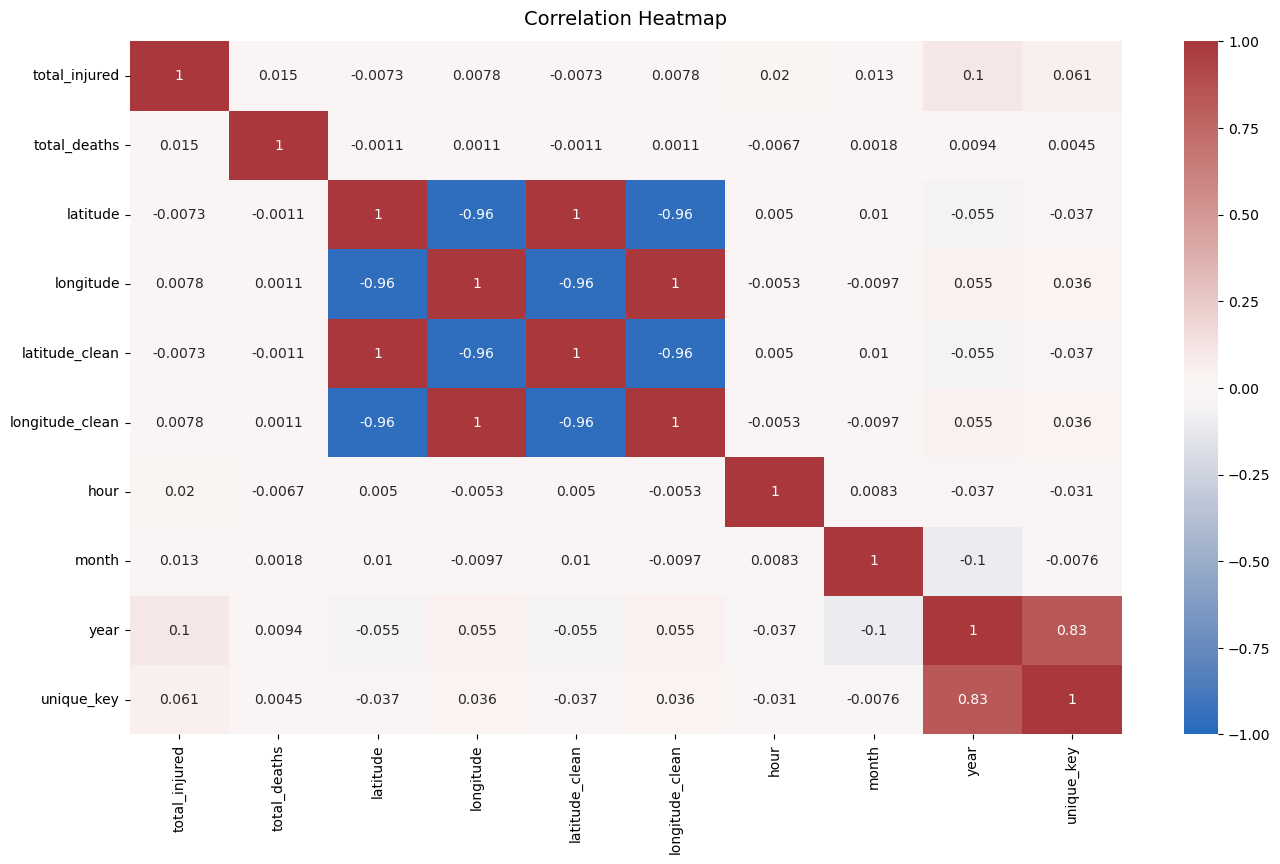

In [97]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(nyc_plots.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [98]:
calculates = ['total_injured', 'total_deaths', 'month', 'year', 'weekday', 'hour']

In [99]:
nyc_calc = nyc_select[calculates].copy()
print(nyc_calc)

         total_injured  total_deaths  month  year weekday  hour
0                    4             0      3  2024  Sunday    22
1                    2             0      3  2024  Sunday    21
2                    0             0      3  2024  Sunday    20
3                    2             0      3  2024  Sunday    19
4                    0             0      3  2024  Sunday    18
...                ...           ...    ...   ...     ...   ...
1837238              0             0      6  2017  Friday    15
1837239              0             0      6  2017  Friday    15
1837240              0             0      6  2017  Friday    15
1837241              0             0      6  2017  Friday    14
1837242              0             0      6  2017  Friday    14

[1837243 rows x 6 columns]


In [100]:
nyc_calc.groupby(['year']).sum().sort_values('total_injured', ascending=False).head(20)

,total_injured,total_deaths,month,weekday,hour
year,,,,,
2018,116012,435,1427296,MondayMondayMondayMondayMondayMondayMondayMond...,2856775
2017,114025,467,1438711,FridayFridayFridayFridayFridayFridayFridayFrid...,2857931
2019,111819,454,1262455,FridayFridayFridayFridayFridayFridayFridayFrid...,2546842
2016,99707,399,1341134,SaturdaySaturdaySaturdaySaturdaySaturdaySaturd...,2544903
2023,97089,475,588899,SundaySundaySundaySundaySundaySundaySundaySund...,1138284
2013,93910,486,1135894,TuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTues...,2312059
2021,92558,501,683321,FridayFridayFridayFridayFridayFridayFridayFrid...,1317198
2022,91596,485,624620,SaturdaySaturdaySaturdaySaturdaySaturdaySaturd...,1206257
2014,86676,430,1137993,WednesdayWednesdayWednesdayWednesdayWednesdayW...,2325754


In [101]:
nyc_calc.groupby(['month']).sum().sort_values('total_injured', ascending=False).head(20)

,total_injured,total_deaths,year,weekday,hour
month,,,,,
8,107286,533,328790769,ThursdayThursdayThursdayThursdayThursdayThursd...,2175723
7,107211,527,330896864,MondayMondayMondayMondayMondayMondayMondayMond...,2188411
9,106340,509,329707456,SaturdaySaturdaySaturdaySaturdaySaturdaySaturd...,2153324
10,106290,476,339497206,TuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTues...,2215620
6,99307,437,312181098,FridayFridayFridayFridayFridayFridayFridayFrid...,2060359
11,97656,510,322934049,ThursdayThursdayThursdayThursdayThursdayThursd...,2104842
12,97322,465,323941675,SundaySundaySundaySundaySundaySundaySundaySund...,2131170
5,95813,413,309020738,WednesdayWednesdayWednesdayWednesdayWednesdayW...,2031914
1,84355,417,297682289,WednesdayWednesdayWednesdayWednesdayWednesdayW...,1916593


In [102]:
nyc_calc.groupby(['weekday']).sum().sort_values('total_injured', ascending=False).head(7)

,total_injured,total_deaths,month,year,hour
weekday,,,,,
Friday,175675,792,1962343,591290989,3949798
Saturday,162915,847,1665197,500556525,3241213
Thursday,162791,721,1840874,553297172,3670506
Tuesday,161552,706,1816603,545451479,3602502
Wednesday,160070,640,1798644,540586917,3587840
Monday,157930,776,1768077,529369248,3419396
Sunday,152772,844,1484168,445406236,2787713


In [103]:
nyc_calc.groupby(['hour']).sum().sort_values('total_injured', ascending=False).head(24)

,total_injured,total_deaths,month,year,weekday
hour,,,,,
17,79032,267,875869,260244444,SundaySundaySaturdayFridayThursdayTuesdayTuesd...
16,76098,218,875500,265336530,SundaySundaySundayFridayFridayFridayThursdayTh...
18,74161,293,765648,228949427,SundaySaturdaySaturdayFridayThursdayWednesdayT...
15,71833,192,762705,231456170,FridayThursdayThursdayTuesdayTuesdayTuesdayMon...
14,68394,197,817163,247018192,SundaySaturdaySaturdayFridayThursdayThursdayTh...
19,64676,273,638267,188738218,SundaySaturdayFridayThursdayThursdayWednesdayT...
20,57946,260,535668,158050906,SundayFridayThursdayWednesdayTuesdayTuesdayTue...
13,57190,199,709713,213801987,SaturdayFridayFridayFridayThursdayWednesdayTue...
8,54787,146,664538,203381594,SundayThursdayThursdayWednesdayWednesdayWednes...


In [104]:
nyc_calc.groupby(['year']).sum().sort_values('total_deaths', ascending=False).head(20)

,total_injured,total_deaths,month,weekday,hour
year,,,,,
2021,92558,501,683321,FridayFridayFridayFridayFridayFridayFridayFrid...,1317198
2013,93910,486,1135894,TuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTues...,2312059
2022,91596,485,624620,SaturdaySaturdaySaturdaySaturdaySaturdaySaturd...,1206257
2023,97089,475,588899,SundaySundaySundaySundaySundaySundaySundaySund...,1138284
2020,81326,474,640427,ThursdayThursdayThursdayThursdayThursdayThursd...,1364998
2017,114025,467,1438711,FridayFridayFridayFridayFridayFridayFridayFrid...,2857931
2019,111819,454,1262455,FridayFridayFridayFridayFridayFridayFridayFrid...,2546842
2018,116012,435,1427296,MondayMondayMondayMondayMondayMondayMondayMond...,2856775
2014,86676,430,1137993,WednesdayWednesdayWednesdayWednesdayWednesdayW...,2325754


In [105]:
nyc_calc.groupby(['month']).sum().sort_values('total_deaths', ascending=False).head(20)

,total_injured,total_deaths,year,weekday,hour
month,,,,,
8,107286,533,328790769,ThursdayThursdayThursdayThursdayThursdayThursd...,2175723
7,107211,527,330896864,MondayMondayMondayMondayMondayMondayMondayMond...,2188411
11,97656,510,322934049,ThursdayThursdayThursdayThursdayThursdayThursd...,2104842
9,106340,509,329707456,SaturdaySaturdaySaturdaySaturdaySaturdaySaturd...,2153324
10,106290,476,339497206,TuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTues...,2215620
12,97322,465,323941675,SundaySundaySundaySundaySundaySundaySundaySund...,2131170
6,99307,437,312181098,FridayFridayFridayFridayFridayFridayFridayFrid...,2060359
1,84355,417,297682289,WednesdayWednesdayWednesdayWednesdayWednesdayW...,1916593
5,95813,413,309020738,WednesdayWednesdayWednesdayWednesdayWednesdayW...,2031914


In [106]:
nyc_calc.groupby(['weekday']).sum().sort_values('total_deaths', ascending=False).head(20)

,total_injured,total_deaths,month,year,hour
weekday,,,,,
Saturday,162915,847,1665197,500556525,3241213
Sunday,152772,844,1484168,445406236,2787713
Friday,175675,792,1962343,591290989,3949798
Monday,157930,776,1768077,529369248,3419396
Thursday,162791,721,1840874,553297172,3670506
Tuesday,161552,706,1816603,545451479,3602502
Wednesday,160070,640,1798644,540586917,3587840


In [107]:
nyc_calc.groupby(['hour']).sum().sort_values('total_deaths', ascending=False).head(20)

,total_injured,total_deaths,month,year,weekday
hour,,,,,
4,19347,300,164175,49179564,SundaySaturdaySaturdaySaturdaySaturdaySaturday...
23,40806,295,345021,102481046,ThursdayThursdayWednesdayTuesdayMondaySundayFr...
18,74161,293,765648,228949427,SundaySaturdaySaturdayFridayThursdayWednesdayT...
0,42337,277,404910,120468065,SundaySaturdayFridayFridayWednesdayTuesdayTues...
21,51645,276,452060,134096008,SundaySaturdayFridayWednesdaySundaySaturdayFri...
19,64676,273,638267,188738218,SundaySaturdayFridayThursdayThursdayWednesdayT...
22,47785,267,412438,122339766,SundaySaturdayFridayWednesdayMondayMondaySatur...
17,79032,267,875869,260244444,SundaySundaySaturdayFridayThursdayTuesdayTuesd...
20,57946,260,535668,158050906,SundayFridayThursdayWednesdayTuesdayTuesdayTue...


In [108]:
cf = ['total_injured', 'total_deaths', 'contributing_factor_vehicle_1']

In [109]:
vt = ['total_injured', 'total_deaths', 'vehicle_type_code_1']

In [110]:
cf = nyc_merged[cf].copy()
print(cf)

         total_injured  total_deaths   contributing_factor_vehicle_1
0                    4             0  Passing or Lane Usage Improper
1                    2             0           Following Too Closely
2                    0             0             Alcohol Involvement
3                    2             0                Brakes Defective
4                    0             0  Driver Inattention/Distraction
...                ...           ...                             ...
1837238              0             0           Following Too Closely
1837239              0             0  Driver Inattention/Distraction
1837240              0             0                 Other Vehicular
1837241              0             0                Backing Unsafely
1837242              0             0           Following Too Closely

[1837243 rows x 3 columns]


In [111]:
vt = nyc_merged[vt].copy()
print(vt)

         total_injured  total_deaths                  vehicle_type_code_1
0                    4             0  Station Wagon/Sport Utility Vehicle
1                    2             0                                Sedan
2                    0             0                                Sedan
3                    2             0                                Sedan
4                    0             0                                Sedan
...                ...           ...                                  ...
1837238              0             0                                 Taxi
1837239              0             0                                Sedan
1837240              0             0  Station Wagon/Sport Utility Vehicle
1837241              0             0                                Sedan
1837242              0             0  Station Wagon/Sport Utility Vehicle

[1837243 rows x 3 columns]


In [112]:
vt['vehicle_type_code_1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1837243 entries, 0 to 1837242
Series name: vehicle_type_code_1
Non-Null Count    Dtype 
--------------    ----- 
1824800 non-null  object
dtypes: object(1)
memory usage: 14.0+ MB


In [113]:
print(vt['vehicle_type_code_1'].value_counts())
print()
print(vt['vehicle_type_code_1'].value_counts(normalize=True) * 100)

vehicle_type_code_1
Sedan                                  532478
Station Wagon/Sport Utility Vehicle    413895
PASSENGER VEHICLE                      347162
SPORT UTILITY / STATION WAGON          150919
Taxi                                    47457
                                        ...  
HEAVY TRUC                                  1
Tank                                        1
DOT                                         1
BOXTRUCK                                    1
bobct                                       1
Name: count, Length: 1510, dtype: int64

vehicle_type_code_1
Sedan                                  29.180075
Station Wagon/Sport Utility Vehicle    22.681664
PASSENGER VEHICLE                      19.024660
SPORT UTILITY / STATION WAGON           8.270441
Taxi                                    2.600669
                                         ...    
HEAVY TRUC                              0.000055
Tank                                    0.000055
DOT                  

In [114]:
print(cf['contributing_factor_vehicle_1'].value_counts())
print()
print(cf['contributing_factor_vehicle_1'].value_counts(normalize=True) * 100)

contributing_factor_vehicle_1
Unspecified                       622066
Driver Inattention/Distraction    373659
Failure to Yield Right-of-Way     112301
Following Too Closely              94935
Backing Unsafely                   70125
                                   ...  
Cell Phone (hand-held)                66
80                                    62
Texting                               47
Listening/Using Headphones            21
1                                      5
Name: count, Length: 61, dtype: int64

contributing_factor_vehicle_1
Unspecified                       33.972684
Driver Inattention/Distraction    20.406515
Failure to Yield Right-of-Way      6.133057
Following Too Closely              5.184654
Backing Unsafely                   3.829713
                                    ...    
Cell Phone (hand-held)             0.003604
80                                 0.003386
Texting                            0.002567
Listening/Using Headphones         0.001147
1         

In [115]:
vt.isna().sum()

total_injured              0
total_deaths               0
vehicle_type_code_1    12443
dtype: int64

In [116]:
cf.isna().sum()

total_injured                       0
total_deaths                        0
contributing_factor_vehicle_1    6166
dtype: int64

In [117]:
vt.dropna()

,total_injured,total_deaths,vehicle_type_code_1
0,4,0,Station Wagon/Sport Utility Vehicle
1,2,0,Sedan
2,0,0,Sedan
3,2,0,Sedan
4,0,0,Sedan
...,...,...,...
1837238,0,0,Taxi
1837239,0,0,Sedan
1837240,0,0,Station Wagon/Sport Utility Vehicle
1837241,0,0,Sedan


In [118]:
cf.dropna()

,total_injured,total_deaths,contributing_factor_vehicle_1
0,4,0,Passing or Lane Usage Improper
1,2,0,Following Too Closely
2,0,0,Alcohol Involvement
3,2,0,Brakes Defective
4,0,0,Driver Inattention/Distraction
...,...,...,...
1837238,0,0,Following Too Closely
1837239,0,0,Driver Inattention/Distraction
1837240,0,0,Other Vehicular
1837241,0,0,Backing Unsafely


In [119]:
vt_nona = vt.dropna()

In [120]:
vt_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1824800 entries, 0 to 1837242
Data columns (total 3 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   total_injured        int64 
 1   total_deaths         int64 
 2   vehicle_type_code_1  object
dtypes: int64(2), object(1)
memory usage: 55.7+ MB


In [121]:
vt_nona.isna().sum()

total_injured          0
total_deaths           0
vehicle_type_code_1    0
dtype: int64

In [122]:
cf_nona = cf.dropna()

In [123]:
cf_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831077 entries, 0 to 1837242
Data columns (total 3 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   total_injured                  int64 
 1   total_deaths                   int64 
 2   contributing_factor_vehicle_1  object
dtypes: int64(2), object(1)
memory usage: 55.9+ MB


In [124]:
cf_nona.isna().sum()

total_injured                    0
total_deaths                     0
contributing_factor_vehicle_1    0
dtype: int64

In [125]:
cf_nona.groupby(['contributing_factor_vehicle_1']).sum().sort_values('total_injured', ascending=False).head(6)

,total_injured,total_deaths
contributing_factor_vehicle_1,,
Unspecified,317924,1704
Driver Inattention/Distraction,246326,640
Failure to Yield Right-of-Way,115421,494
Following Too Closely,72287,42
Traffic Control Disregarded,45605,471
Unsafe Speed,34871,692


In [126]:
cf_nona.groupby(['contributing_factor_vehicle_1']).sum().sort_values('total_deaths', ascending=False).head(6)

,total_injured,total_deaths
contributing_factor_vehicle_1,,
Unspecified,317924,1704
Unsafe Speed,34871,692
Driver Inattention/Distraction,246326,640
Failure to Yield Right-of-Way,115421,494
Traffic Control Disregarded,45605,471
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,13865,171


In [127]:
vt_nona.groupby(['vehicle_type_code_1']).sum().sort_values('total_injured', ascending=False).head(5)

,total_injured,total_deaths
vehicle_type_code_1,,
Sedan,359964,1147
Station Wagon/Sport Utility Vehicle,273149,1062
PASSENGER VEHICLE,180735,674
SPORT UTILITY / STATION WAGON,76935,378
Taxi,34026,88


In [128]:
vt_nona.groupby(['vehicle_type_code_1']).sum().sort_values('total_deaths', ascending=False).head(5)

,total_injured,total_deaths
vehicle_type_code_1,,
Sedan,359964,1147
Station Wagon/Sport Utility Vehicle,273149,1062
PASSENGER VEHICLE,180735,674
SPORT UTILITY / STATION WAGON,76935,378
Motorcycle,9620,360


In [471]:
cf_nona_d = cf_nona[(cf_nona['contributing_factor_vehicle_1'] == 'Unspecified') | (cf_nona['contributing_factor_vehicle_1'] == 'Unsafe Speed') | (cf_nona['contributing_factor_vehicle_1'] == 'Driver Inattention/Distraction') | (cf_nona['contributing_factor_vehicle_1'] == 'Failure to Yield Right-of-Way') | (cf_nona['contributing_factor_vehicle_1'] == 'Traffic Control Disregarded') | (cf_nona['contributing_factor_vehicle_1'] == 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion')]


In [473]:
cf_nona_d.head()

,total_injured,total_deaths,contributing_factor_vehicle_1
4,0,0,Driver Inattention/Distraction
6,0,0,Unspecified
8,0,0,Unsafe Speed
9,2,0,Driver Inattention/Distraction
11,0,0,Unsafe Speed


In [373]:
cf_nona_i = cf_nona[(cf_nona['contributing_factor_vehicle_1'] == 'Unspecified') | (cf_nona['contributing_factor_vehicle_1'] == 'Driver Inattention/Distraction') | (cf_nona['contributing_factor_vehicle_1'] == 'Failure to Yield Right-of-Way') | (cf_nona['contributing_factor_vehicle_1'] == 'Following Too Closely') | (cf_nona['contributing_factor_vehicle_1'] == 'Traffic Control Disregarded') | (cf_nona['contributing_factor_vehicle_1'] == 'Unsafe Speed')]


In [377]:
cf_nona_i.head(10)

,total_injured,total_deaths,contributing_factor_vehicle_1
1,2,0,Following Too Closely
4,0,0,Driver Inattention/Distraction
6,0,0,Unspecified
8,0,0,Unsafe Speed
9,2,0,Driver Inattention/Distraction
11,0,0,Unsafe Speed
15,0,0,Driver Inattention/Distraction
16,0,0,Unspecified
17,2,0,Unspecified
18,0,0,Driver Inattention/Distraction


In [133]:
vt_nona_i = vt_nona[(vt_nona['vehicle_type_code_1'] == 'Sedan') | (vt_nona['vehicle_type_code_1'] == 'Station Wagon/Sport Utility Vehicle') | (vt_nona['vehicle_type_code_1'] == 'PASSENGER VEHICLE') | (vt_nona['vehicle_type_code_1'] == 'SPORT UTILITY / STATION WAGON') | (vt_nona['vehicle_type_code_1'] == 'Taxi')]


In [134]:
vt_nona_d = vt_nona[(vt_nona['vehicle_type_code_1'] == 'Sedan') | (vt_nona['vehicle_type_code_1'] == 'Station Wagon/Sport Utility Vehicle') | (vt_nona['vehicle_type_code_1'] == 'PASSENGER VEHICLE') | (vt_nona['vehicle_type_code_1'] == 'SPORT UTILITY / STATION WAGON') | (vt_nona['vehicle_type_code_1'] == 'Motorcycle')]


In [135]:
vt_nona_i.head()

,total_injured,total_deaths,vehicle_type_code_1
0,4,0,Station Wagon/Sport Utility Vehicle
1,2,0,Sedan
2,0,0,Sedan
3,2,0,Sedan
4,0,0,Sedan


In [136]:
vt_nona_d.head()

,total_injured,total_deaths,vehicle_type_code_1
0,4,0,Station Wagon/Sport Utility Vehicle
1,2,0,Sedan
2,0,0,Sedan
3,2,0,Sedan
4,0,0,Sedan


In [137]:
# Change vehicle_type_code_1 to INT

In [138]:
vt_nona_injs = vt_nona[(vt_nona['vehicle_type_code_1'] == 'Sedan') | (vt_nona['vehicle_type_code_1'] == 'Station Wagon/Sport Utility Vehicle') | (vt_nona['vehicle_type_code_1'] == 'PASSENGER VEHICLE') | (vt_nona['vehicle_type_code_1'] == 'SPORT UTILITY / STATION WAGON') | (vt_nona['vehicle_type_code_1'] == 'Taxi')]


In [139]:
conditions = [
    (vt_nona_i['vehicle_type_code_1'] == 'Sedan'),
    (vt_nona_i['vehicle_type_code_1'] == 'Station Wagon/Sport Utility Vehicle'),
    (vt_nona_i['vehicle_type_code_1'] == 'PASSENGER VEHICLE'),
    (vt_nona_i['vehicle_type_code_1'] == 'SPORT UTILITY / STATION WAGON'),
    (vt_nona_i['vehicle_type_code_1'] == 'Taxi'),
]

values = ['1', '2', '3', '4', '5']

vt_nona_injs['vehicle_type_code_1'] = np.select(conditions, values)

/var/folders/g1/x4p4hv_n34q21npdsk9x9m8c0000gn/T/ipykernel_1026/1542705162.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vt_nona_injs['vehicle_type_code_1'] = np.select(conditions, values)


In [140]:
vt_nona_injs.head()

,total_injured,total_deaths,vehicle_type_code_1
0,4,0,2
1,2,0,1
2,0,0,1
3,2,0,1
4,0,0,1


In [141]:
vt_no0s_i = vt_nona_injs.drop('total_deaths', axis=1)

In [142]:
vt_no0s_i.head()

,total_injured,vehicle_type_code_1
0,4,2
1,2,1
2,0,1
3,2,1
4,0,1


In [143]:
vt_nona_dths = vt_nona[(vt_nona['vehicle_type_code_1'] == 'Sedan') | (vt_nona['vehicle_type_code_1'] == 'Station Wagon/Sport Utility Vehicle') | (vt_nona['vehicle_type_code_1'] == 'PASSENGER VEHICLE') | (vt_nona['vehicle_type_code_1'] == 'SPORT UTILITY / STATION WAGON') | (vt_nona['vehicle_type_code_1'] == 'Motorcycle')]


In [144]:
conditions = [
    (vt_nona_d['vehicle_type_code_1'] == 'Sedan'),
    (vt_nona_d['vehicle_type_code_1'] == 'Station Wagon/Sport Utility Vehicle'),
    (vt_nona_d['vehicle_type_code_1'] == 'PASSENGER VEHICLE'),
    (vt_nona_d['vehicle_type_code_1'] == 'SPORT UTILITY / STATION WAGON'),
    (vt_nona_d['vehicle_type_code_1'] == 'Motorcycle'),
]

values = ['1', '2', '3', '4', '5']

vt_nona_dths['vehicle_type_code_1'] = np.select(conditions, values)

/var/folders/g1/x4p4hv_n34q21npdsk9x9m8c0000gn/T/ipykernel_1026/3193383558.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vt_nona_dths['vehicle_type_code_1'] = np.select(conditions, values)


In [145]:
vt_nona_dths.head()

,total_injured,total_deaths,vehicle_type_code_1
0,4,0,2
1,2,0,1
2,0,0,1
3,2,0,1
4,0,0,1


In [146]:
vt_no0s_d = vt_nona_dths.drop('total_injured', axis=1)

In [147]:
vt_no0s_d.head()

,total_deaths,vehicle_type_code_1
0,0,2
1,0,1
2,0,1
3,0,1
4,0,1


In [379]:
cf_nona_injs = cf_nona[(cf_nona['contributing_factor_vehicle_1'] == 'Unspecified') | (cf_nona['contributing_factor_vehicle_1'] == 'Driver Inattention/Distraction') | (cf_nona['contributing_factor_vehicle_1'] == 'Failure to Yield Right-of-Way') | (cf_nona['contributing_factor_vehicle_1'] == 'Following Too Closely') | (cf_nona['contributing_factor_vehicle_1'] == 'Traffic Control Disregarded') | (cf_nona['contributing_factor_vehicle_1'] == 'Unsafe Speed')]


In [381]:
conditions = [
    (cf_nona_i['contributing_factor_vehicle_1'] == 'Unspecified'),
    (cf_nona_i['contributing_factor_vehicle_1'] == 'Driver Inattention/Distraction'),
    (cf_nona_i['contributing_factor_vehicle_1'] == 'Failure to Yield Right-of-Way'),
    (cf_nona_i['contributing_factor_vehicle_1'] == 'Following Too Closely'),
    (cf_nona_i['contributing_factor_vehicle_1'] == 'Traffic Control Disregarded'),
    (cf_nona_i['contributing_factor_vehicle_1'] == 'Unsafe Speed'),
]

values = ['1', '2', '3', '4', '5', '6']

cf_nona_injs['contributing_factor_vehicle_1'] = np.select(conditions, values)

/var/folders/g1/x4p4hv_n34q21npdsk9x9m8c0000gn/T/ipykernel_1026/1778577776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_nona_injs['contributing_factor_vehicle_1'] = np.select(conditions, values)


In [383]:
cf_nona_injs.head()

,total_injured,total_deaths,contributing_factor_vehicle_1
1,2,0,4
4,0,0,2
6,0,0,1
8,0,0,6
9,2,0,2


In [385]:
cf_no0s_i = cf_nona_injs.drop('total_deaths', axis=1)

In [387]:
cf_no0s_i.head()

,total_injured,contributing_factor_vehicle_1
1,2,4
4,0,2
6,0,1
8,0,6
9,2,2


In [475]:
cf_nona_dths = cf_nona[(cf_nona['contributing_factor_vehicle_1'] == 'Unspecified') | (cf_nona['contributing_factor_vehicle_1'] == 'Unsafe Speed') | (cf_nona['contributing_factor_vehicle_1'] == 'Driver Inattention/Distraction') | (cf_nona['contributing_factor_vehicle_1'] == 'Failure to Yield Right-of-Way') | (cf_nona['contributing_factor_vehicle_1'] == 'Traffic Control Disregarded') | (cf_nona['contributing_factor_vehicle_1'] == 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion')]


In [495]:
conditions = [
    (cf_nona_d['contributing_factor_vehicle_1'] == 'Unspecified'),
    (cf_nona_d['contributing_factor_vehicle_1'] == 'Unsafe Speed'),
    (cf_nona_d['contributing_factor_vehicle_1'] == 'Driver Inattention/Distraction'),
    (cf_nona_d['contributing_factor_vehicle_1'] == 'Failure to Yield Right-of-Way'),
    (cf_nona_d['contributing_factor_vehicle_1'] == 'Traffic Control Disregarded'),
    (cf_nona_d['contributing_factor_vehicle_1'] == 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion'),
]

values = ['1', '2', '3', '4', '5', '6']

cf_nona_dths['contributing_factor_vehicle_1'] = np.select(conditions, values)

/var/folders/g1/x4p4hv_n34q21npdsk9x9m8c0000gn/T/ipykernel_1026/911758969.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_nona_dths['contributing_factor_vehicle_1'] = np.select(conditions, values)


In [497]:
cf_nona_dths.head()

,total_injured,total_deaths,contributing_factor_vehicle_1
4,0,0,3
6,0,0,1
8,0,0,2
9,2,0,3
11,0,0,2


In [499]:
cf_no0s_d = cf_nona_dths.drop('total_injured', axis=1)

In [501]:
cf_no0s_d.head()

,total_deaths,contributing_factor_vehicle_1
4,0,3
6,0,1
8,0,2
9,0,3
11,0,2


In [503]:
vt_no0_ds = vt_no0s_d[vt_no0s_d["total_deaths"] > 0]

In [505]:
vt_no0_ds.head()

,total_deaths,vehicle_type_code_1
998,2,1
2552,2,5
2973,2,1
3418,2,5
3679,2,2


In [507]:
vt_no0_is = vt_no0s_i[vt_no0s_i["total_injured"] > 0]

In [509]:
vt_no0_is.head()

,total_injured,vehicle_type_code_1
0,4,2
1,2,1
3,2,1
17,2,5
22,2,1


In [511]:
cf_no0_ds = cf_no0s_d[cf_no0s_d["total_deaths"] > 0]

In [513]:
cf_no0_ds.head()

,total_deaths,contributing_factor_vehicle_1
420,2,3
998,2,1
1817,2,1
2080,2,5
2552,2,2


In [515]:
cf_no0_is = cf_no0s_i[cf_no0s_i["total_injured"] > 0]

In [517]:
cf_no0_is.head()

,total_injured,contributing_factor_vehicle_1
1,2,4
9,2,2
17,2,1
22,2,3
24,2,3


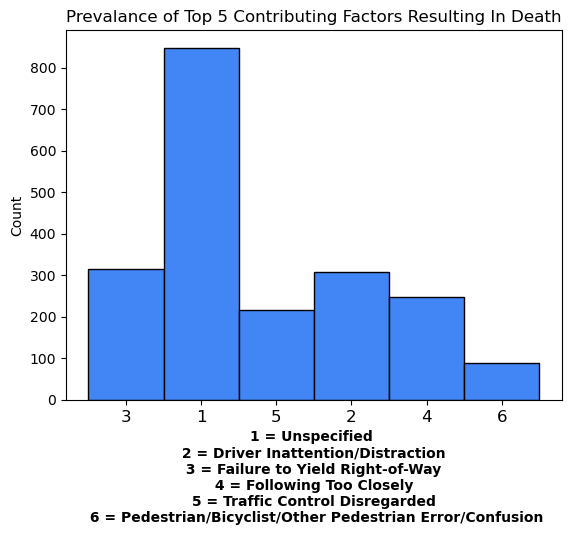

In [605]:
ax = sns.histplot(cf_no0_ds['contributing_factor_vehicle_1'], binrange=(0, 5),binwidth=3, color='#4285F4', alpha=1)
ax.set_xticks(range(0, 6, 1))
ax.set_yticks
plt.xlabel('1 = Unspecified \n 2 = Driver Inattention/Distraction \n 3 = Failure to Yield Right-of-Way \n 4 = Following Too Closely \n 5 = Traffic Control Disregarded \n 6 = Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', fontweight ='bold')
plt.xticks(size=12)
plt.title('Prevalance of Top 5 Contributing Factors Resulting In Death')
plt.show();

Text(0.5, 1.0, 'Top 5 Contributing Factors Resulting In Death')

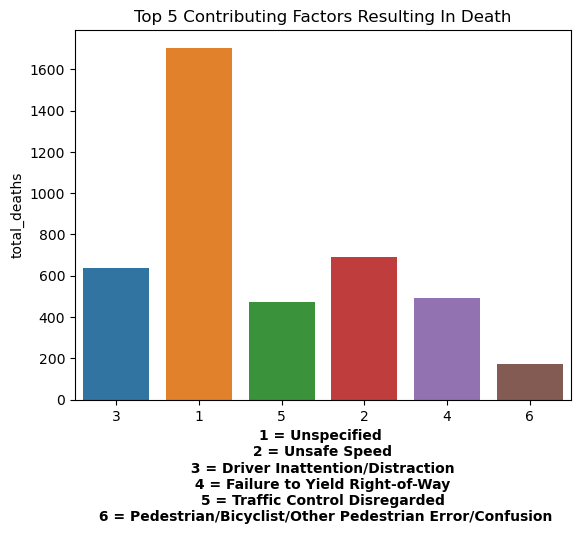

In [601]:
sns.barplot(cf_no0_ds, x="contributing_factor_vehicle_1", y="total_deaths", estimator="sum", errorbar=None)
plt.xlabel('1 = Unspecified \n 2 = Unsafe Speed \n 3 = Driver Inattention/Distraction \n 4 = Failure to Yield Right-of-Way \n 5 = Traffic Control Disregarded \n 6 = Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', fontweight ='bold')
plt.title('Top 5 Contributing Factors Resulting In Death')

In [523]:
print(cf_no0_ds['contributing_factor_vehicle_1'].value_counts())
print()
print(cf_no0_ds['contributing_factor_vehicle_1'].value_counts(normalize=True) * 100)

contributing_factor_vehicle_1
1    848
3    315
2    308
4    247
5    215
6     88
Name: count, dtype: int64

contributing_factor_vehicle_1
1    41.959426
3    15.586343
2    15.239980
4    12.221672
5    10.638298
6     4.354280
Name: proportion, dtype: float64


In [567]:
print(cf_no0_ds.groupby(['contributing_factor_vehicle_1']).sum().sort_values('total_deaths', ascending=False).head(6))

                               total_deaths
contributing_factor_vehicle_1              
1                                      1704
2                                       692
3                                       640
4                                       494
5                                       471
6                                       171


In [597]:
cf_no0_ds['total_deaths'].sum()

4172

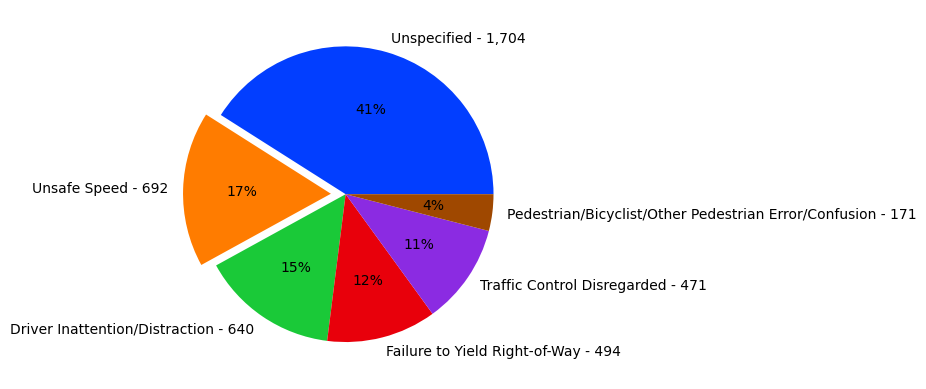

In [625]:
data = [41, 17, 15, 12, 11, 4] 
keys = ['Unspecified - 1,704', 'Unsafe Speed - 692', 'Driver Inattention/Distraction - 640', 'Failure to Yield Right-of-Way - 494', 'Traffic Control Disregarded - 471', 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion - 171'] 
 
explode = [0, 0.1, 0, 0, 0, 0] 
 
colors = sns.color_palette('bright')[0:6]

plt.pie(data, labels=keys, colors=colors, 
        explode=explode, autopct='%.0f%%') 

plt.show() 

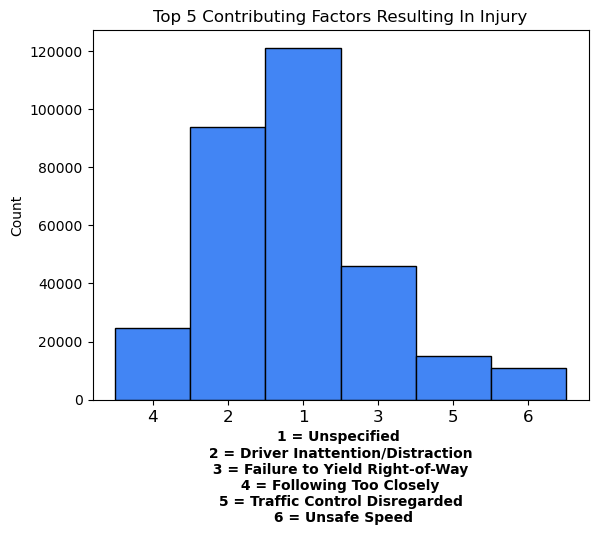

In [453]:
ax = sns.histplot(cf_no0_is['contributing_factor_vehicle_1'], binrange=(0, 5),binwidth=3, color='#4285F4', alpha=1)
ax.set_xticks(range(0, 6, 1))
ax.set_yticks
plt.xlabel('1 = Unspecified \n 2 = Driver Inattention/Distraction \n 3 = Failure to Yield Right-of-Way \n 4 = Following Too Closely \n 5 = Traffic Control Disregarded \n 6 = Unsafe Speed', fontweight ='bold')
plt.xticks(size=12)
plt.title('Top 5 Contributing Factors Resulting In Injury')
plt.show();

Text(0.5, 1.0, 'Top 5 Contributing Factors Resulting In Injury')

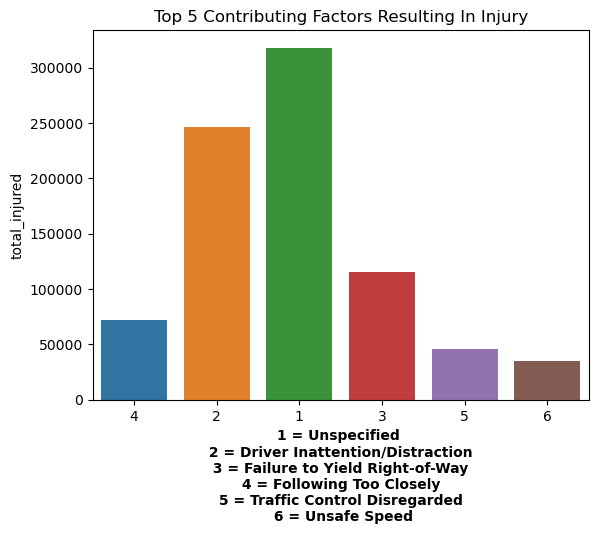

In [615]:
sns.barplot(cf_no0_is, x="contributing_factor_vehicle_1", y="total_injured", estimator="sum", errorbar=None)
plt.xlabel('1 = Unspecified \n 2 = Driver Inattention/Distraction \n 3 = Failure to Yield Right-of-Way \n 4 = Following Too Closely \n 5 = Traffic Control Disregarded \n 6 = Unsafe Speed', fontweight ='bold')
plt.title('Top 5 Contributing Factors Resulting In Injury')

In [617]:
print(cf_no0_is['contributing_factor_vehicle_1'].value_counts())
print()
print(cf_no0_is['contributing_factor_vehicle_1'].value_counts(normalize=True) * 100)

contributing_factor_vehicle_1
1    121137
2     93750
3     45894
4     24631
5     15085
6     10770
Name: count, dtype: int64

contributing_factor_vehicle_1
1    38.917392
2    30.118837
3    14.744255
4     7.913142
5     4.846322
6     3.460052
Name: proportion, dtype: float64


In [593]:
cf_no0_is.groupby(['contributing_factor_vehicle_1']).sum().sort_values('total_injured', ascending=False).head(6)

,total_injured
contributing_factor_vehicle_1,
1,317924
2,246326
3,115421
4,72287
5,45605
6,34871


In [595]:
cf_no0_is['total_injured'].sum()

832434

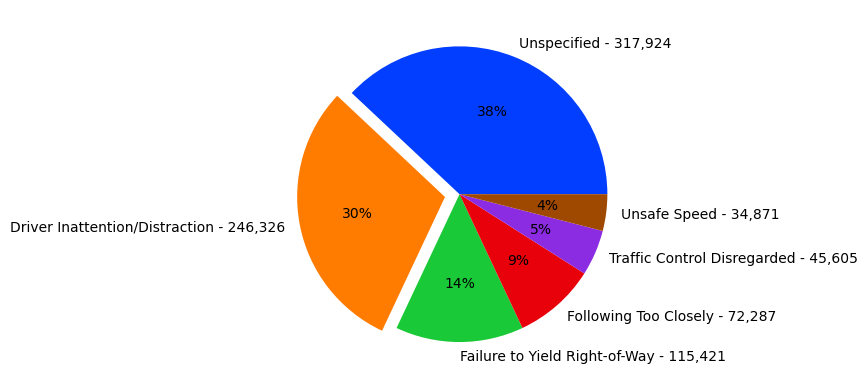

In [623]:
data = [38, 30, 14, 9, 5, 4] 
keys = ['Unspecified - 317,924', 'Driver Inattention/Distraction - 246,326', 'Failure to Yield Right-of-Way - 115,421', 'Following Too Closely - 72,287', 'Traffic Control Disregarded - 45,605', 'Unsafe Speed - 34,871'] 
 
explode = [0, 0.1, 0, 0, 0, 0] 
 
colors = sns.color_palette('bright')[0:6]

plt.pie(data, labels=keys, colors=colors, 
        explode=explode, autopct='%.0f%%') 

plt.show() 

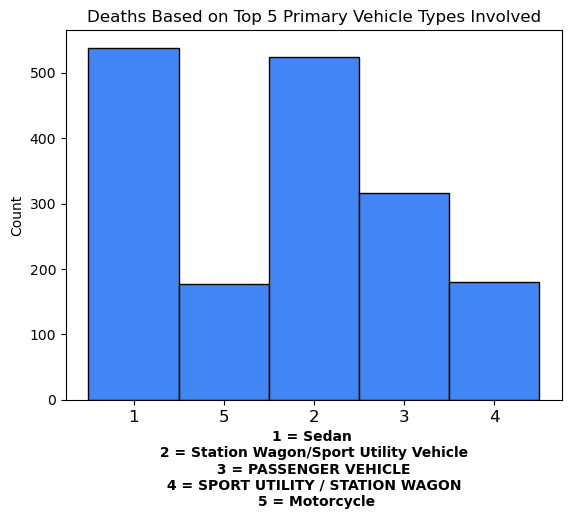

In [168]:
ax = sns.histplot(vt_no0_ds['vehicle_type_code_1'], binrange=(0, 4),binwidth=3, color='#4285F4', alpha=1)
ax.set_xticks(range(0, 5, 1))
ax.set_yticks
plt.xlabel('1 = Sedan \n 2 = Station Wagon/Sport Utility Vehicle \n 3 = PASSENGER VEHICLE \n 4 = SPORT UTILITY / STATION WAGON \n 5 = Motorcycle', fontweight ='bold')
plt.xticks(size=12)
plt.title('Deaths Based on Top 5 Primary Vehicle Types Involved')
plt.show();

Text(0.5, 1.0, 'Number of Deaths Based on Top 5 Primary Vehicle Types Involved')

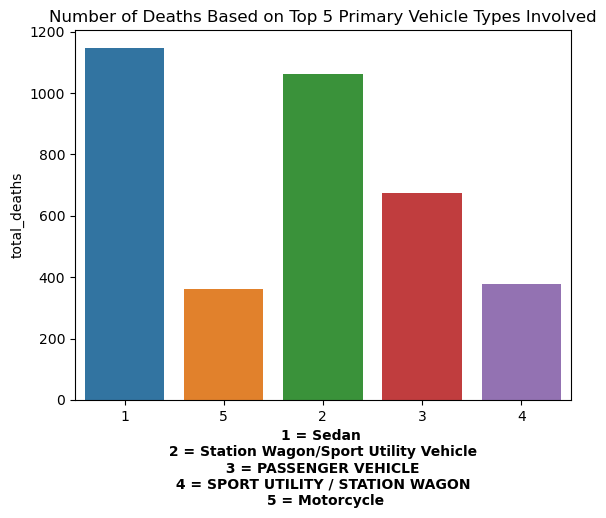

In [577]:
sns.barplot(vt_no0_ds, x="vehicle_type_code_1", y="total_deaths", estimator="sum", errorbar=None)
plt.xlabel('1 = Sedan \n 2 = Station Wagon/Sport Utility Vehicle \n 3 = PASSENGER VEHICLE \n 4 = SPORT UTILITY / STATION WAGON \n 5 = Motorcycle', fontweight ='bold')
plt.title('Number of Deaths Based on Top 5 Primary Vehicle Types Involved')

In [335]:
print(vt_no0_ds['vehicle_type_code_1'].value_counts())
print()
print(vt_no0_ds['vehicle_type_code_1'].value_counts(normalize=True) * 100)

vehicle_type_code_1
1    538
2    524
3    317
4    180
5    177
Name: count, dtype: int64

vehicle_type_code_1
1    30.990783
2    30.184332
3    18.260369
4    10.368664
5    10.195853
Name: proportion, dtype: float64


In [583]:
vt_no0_ds.groupby(['vehicle_type_code_1']).sum().sort_values('total_deaths', ascending=False).head(6)

,total_deaths
vehicle_type_code_1,
1,1147
2,1062
3,674
4,378
5,360


In [589]:
vt_no0_ds['total_deaths'].sum()

3621

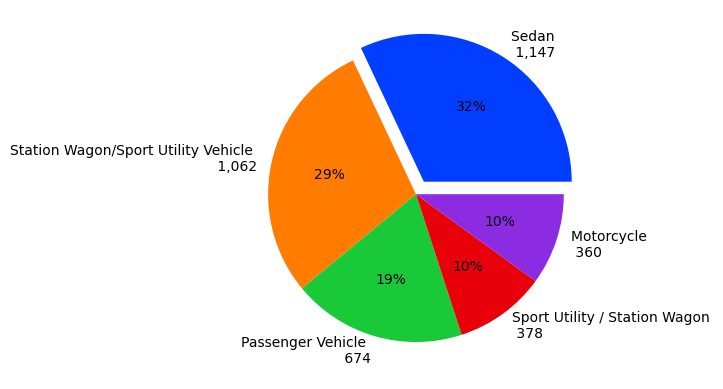

In [633]:
data = [32, 29, 19, 10, 10] 
keys = ['Sedan \n 1,147', 'Station Wagon/Sport Utility Vehicle \n 1,062', 'Passenger Vehicle \n 674', 'Sport Utility / Station Wagon \n 378', 'Motorcycle \n 360'] 
   
explode = [0.1, 0, 0, 0, 0] 

colors = sns.color_palette('bright')[0:5]
  
plt.pie(data, labels=keys, colors=colors, 
        explode=explode, autopct='%.0f%%') 
  
plt.show() 

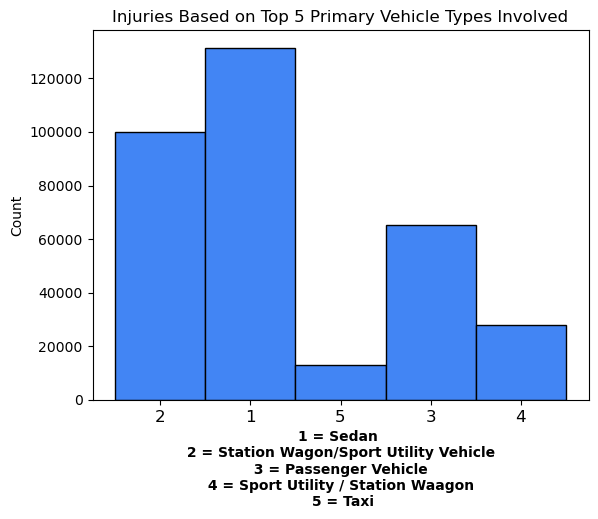

In [559]:
ax = sns.histplot(vt_no0_is['vehicle_type_code_1'], binrange=(0, 4),binwidth=3, color='#4285F4', alpha=1)
ax.set_xticks(range(0, 5, 1))
ax.set_yticks
plt.xlabel('1 = Sedan \n 2 = Station Wagon/Sport Utility Vehicle \n 3 = Passenger Vehicle \n 4 = Sport Utility / Station Waagon \n 5 = Taxi', fontweight ='bold')
plt.xticks(size=12)
plt.title('Injuries Based on Top 5 Primary Vehicle Types Involved')
plt.show();

Text(0.5, 0, '1 = Sedan \n 2 = Station Wagon/Sport Utility Vehicle \n 3 = Passenger Vehicle \n 4 = Sport Utility / Station Waagon \n 5 = Taxi')

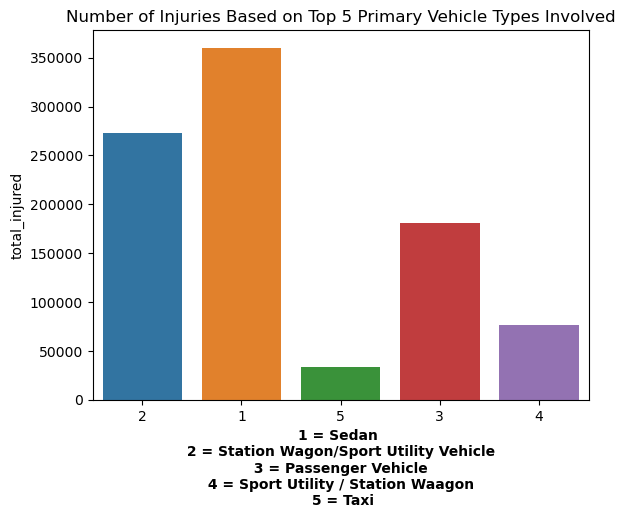

In [565]:
sns.barplot(vt_no0_is, x="vehicle_type_code_1", y="total_injured", estimator="sum", errorbar=None)
plt.title('Number of Injuries Based on Top 5 Primary Vehicle Types Involved')
plt.xlabel('1 = Sedan \n 2 = Station Wagon/Sport Utility Vehicle \n 3 = Passenger Vehicle \n 4 = Sport Utility / Station Waagon \n 5 = Taxi', fontweight ='bold')

In [337]:
print(vt_no0_is['vehicle_type_code_1'].value_counts())
print()
print(vt_no0_is['vehicle_type_code_1'].value_counts(normalize=True) * 100)

vehicle_type_code_1
1    131355
2    100038
3     65235
4     27934
5     12968
Name: count, dtype: int64

vehicle_type_code_1
1    38.916541
2    29.638254
3    19.327171
4     8.276005
5     3.842029
Name: proportion, dtype: float64


In [561]:
vt_no0_is.groupby(['vehicle_type_code_1']).sum().sort_values('total_injured', ascending=False).head(6)

,total_injured
vehicle_type_code_1,
1,359964
2,273149
3,180735
4,76935
5,34026


In [587]:
vt_no0_is['total_injured'].sum()

924809

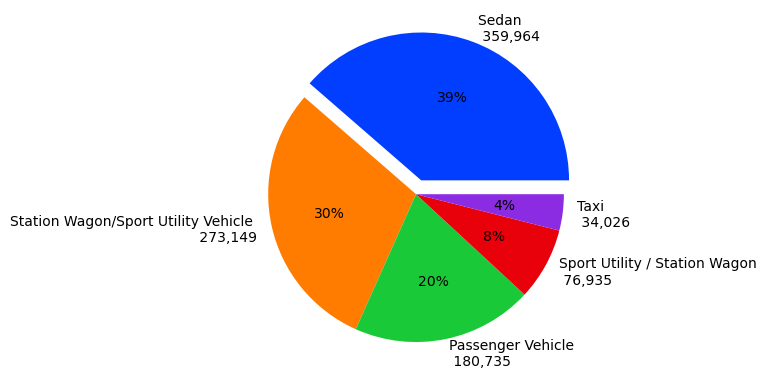

In [635]:
import seaborn 

data = [39, 30, 20, 8, 4] 
keys = ['Sedan \n 359,964', 'Station Wagon/Sport Utility Vehicle \n 273,149', 'Passenger Vehicle \n 180,735', 'Sport Utility / Station Wagon \n 76,935', 'Taxi \n 34,026'] 
 
explode = [0.1, 0, 0, 0, 0] 
 
colors = sns.color_palette('bright')[0:5]

plt.pie(data, labels=keys, colors=colors, 
        explode=explode, autopct='%.0f%%') 

plt.show() 